<a href="https://colab.research.google.com/github/ricardo-emanuel24/Ciencia-de-Dados/blob/main/Atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução
Como se sabe o mercado imobiliário depende de diversos fatores, como localidade, área de imóvel, entre outros, e tem impacto sobre investidores, corretores e consumidores em geral.

Este estudo tem como objetivo desenvolver um modelo de rede neural para prever o preço médio de casas na Califórnia com base em variáveis socioeconômicas e geográficas, auxiliando na análise de mercado e na tomada de decisões estratégicas. Além de avaliar o desempenho do modelo usando métricas como erro médio quadrático (MSE) e coeficiente de determinação (R²).

In [16]:
# Importando bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

# 3. Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4. Criação da Rede Neural com TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# 2. Carregamento e Exploração dos Dados

* Utilizamos o `fetch_california_housing() `da Scikit-Learn para carregar o dataset com informações sobre imóveis na Califórnia.
* Transformamos os dados em um DataFrame do Pandas para facilitar a manipulação.
* **Análise Exploratória**:
  * `info()` e `describe()` mostram o resumo dos dados e estatísticas descritivas (média, desvio padrão, etc.).
  * O heatmap exibe a correlação entre as variáveis para identificar quais podem influenciar mais o preço da casa.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

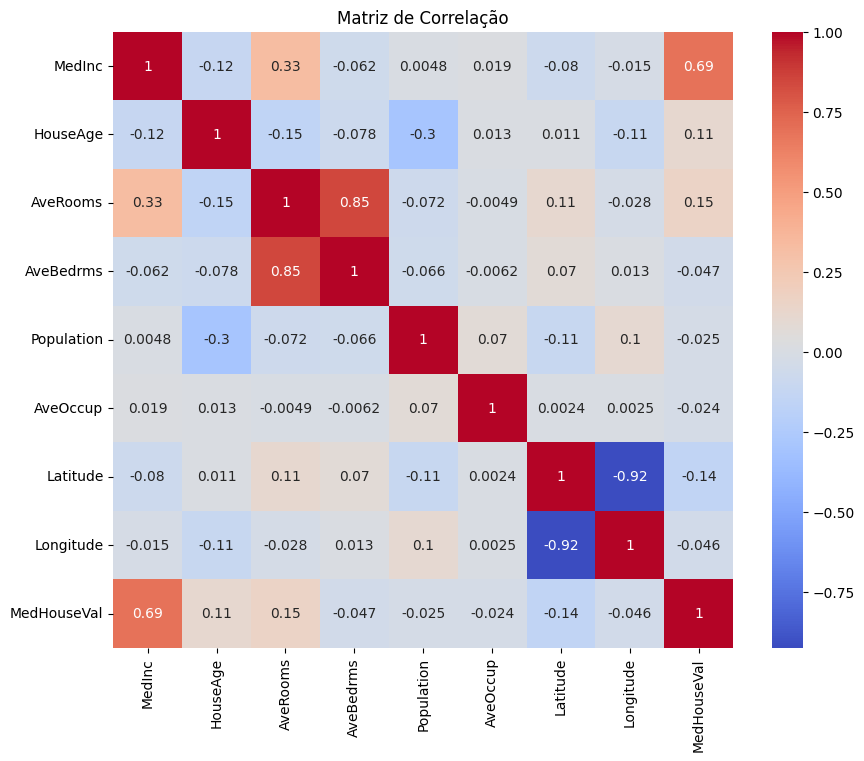

In [17]:
# Carregar o dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Explorando os dados
print(df.info())
print(df.describe())

# Visualizar a correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 3. Pré-processamento
* **Separação de Features e Target**:
`x` contém as variáveis independentes (ex.: renda média, número de cômodos), e `y` é o preço médio das casas.
* Dividir os dados em conjuntos de treino (70%), Validação (15%) e Teste (15%) usando `train_test_split()`.
* O `StandardScaler` normaliza os dados, o que é essencial para o bom desempenho da rede neural, deixando todas as variáveis na mesma escala.

In [18]:
# Dividir em features e target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Divisão dos dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

  # 4. Criação da Rede Neural
Utilizamos `Sequential` para criar as seguintes camadas:
* Camada 1: 64 neurônios com função de ativação ReLU.
* Camada 2: 32 neurônios (ReLU).
* Camada 3: 16 neurônios (ReLU).
* Saída: 1 neurônio com ativação linear (ideal para regressão).

O modelo usa o otimizador Adam para ajustar os pesos, e a função de perda MSE (Erro Quadrático Médio), que penaliza grandes erros nas previsões.O modelo usa o otimizador Adam para ajustar os pesos, e a função de perda MSE (Erro Quadrático Médio), que penaliza grandes erros nas previsões.

In [19]:
# Arquitetura da rede
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 # 5. Treinamento e Avaliação do Modelo

* **Treinamento**: O `fit()` treina o modelo em 50 épocas, usando o conjunto de validação para monitorar o desempenho e evitar overfitting.
* **Curvas de Perda**: O gráfico mostra como o erro do modelo diminui ao longo do tempo tanto para o treino quanto para a validação. Se a curva de validação começar a subir enquanto a de treino desce, é sinal de overfitting.
* **Avaliação Final**: O `evaluate()` calcula o MAE (Erro Absoluto Médio) no conjunto de teste, indicando o quão distantes, em média, as previsões estão dos valores reais.

Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4095 - mae: 0.8325 - val_loss: 0.4320 - val_mae: 0.4777
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4227 - mae: 0.4567 - val_loss: 0.3793 - val_mae: 0.4396
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3736 - mae: 0.4290 - val_loss: 0.3642 - val_mae: 0.4261
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3526 - mae: 0.4204 - val_loss: 0.3560 - val_mae: 0.4084
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3383 - mae: 0.4081 - val_loss: 0.3448 - val_mae: 0.4105
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3367 - mae: 0.4043 - val_loss: 0.3403 - val_mae: 0.3998
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.3240 - mae: 0.3962 - val_loss: 0.3297 - val_mae: 0.4066
Epoch 8/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3138 - mae: 0.3916 - val_loss: 0.3209 - val_mae: 0.3878
Epoch 9/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

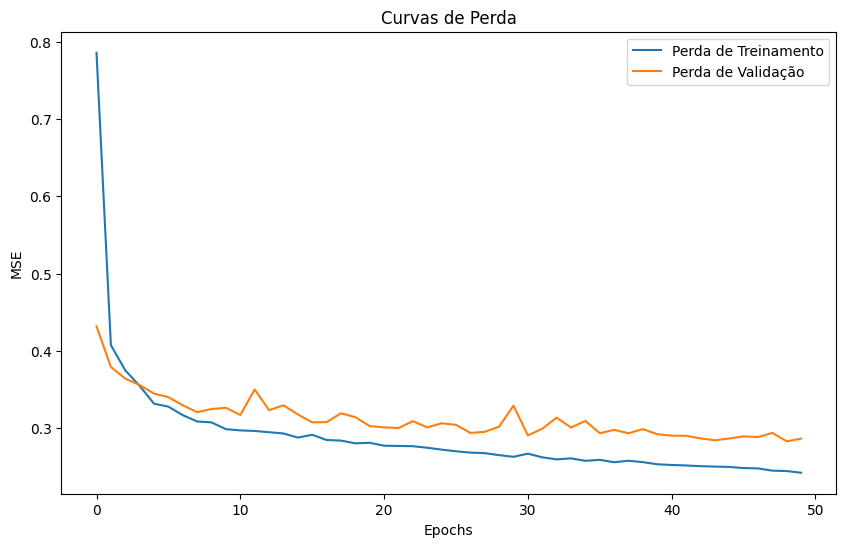

In [20]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Curvas de Perda')
plt.show()

# 6. Análise de Resultados

* **Predições**: O modelo faz previsões sobre o conjunto de teste.
* **Visualização**: O gráfico de dispersão compara os valores reais e previstos. Uma linha vermelha (ideal) indica onde as previsões estariam se fossem perfeitas. Quanto mais próximos da linha, melhor o desempenho do modelo.

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


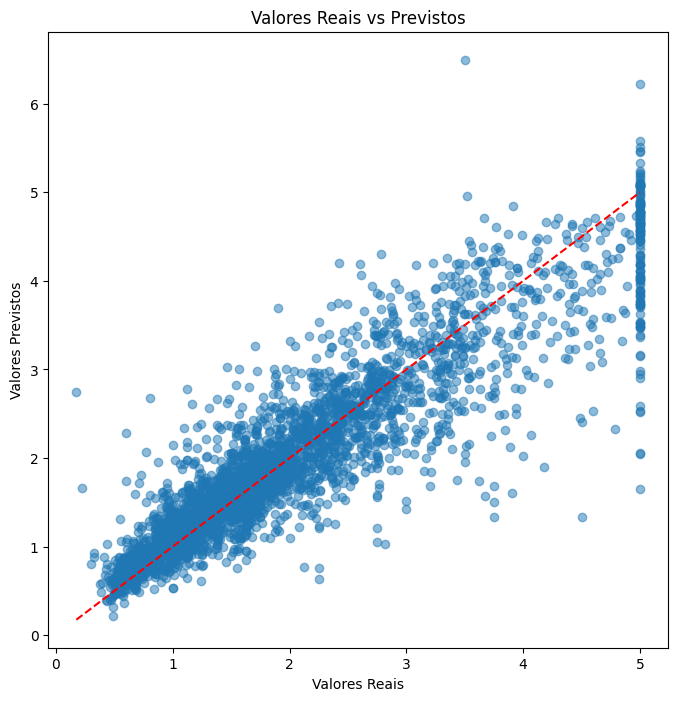


R^2 no conjunto de teste: 0.81


In [22]:
# 6. Análise de Resultados
# Predições
predictions = model.predict(X_test)

# Gráfico de valores reais vs previstos
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Cálculo do R^2
r2 = r2_score(y_test, predictions)
print(f'\n R^2 no conjunto de teste: {r2:.2f}')

 # 7. Conclusão
O modelo foi capaz de prever os preços das casas com um erro médio aceitável. A curva de perda mostrou que o modelo não sofreu overfitting, graças à regularização.

O coeficiente de determinação (R²) indica que o modelo explica uma boa parte da variabilidade dos dados.

**Melhorias**:
* Experimentar outras arquiteturas de rede neural, como redes mais profundas ou redes convolucionais.

* Utilizar técnicas de aumento de dados ou seleção de características para melhorar a precisão.

* Ajustar hiperparâmetros, como taxa de aprendizado e número de neurônios, usando técnicas como Grid Search ou Random Search.

# 8. Árvores de Decisão

Em busca de resultados mais satisfátorio, foi criado um modelo de previsão usando Árvores de Decisão e ao final serão comparados. Os códigos tem as mesmas etapas que a Rede Neural, diferenciando apenas o modelo.

In [26]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Inicialmente, foi gerado um modelo usando `DecisionTreeRegressor`, mas foi sugerido pelo professor verificar utilizando `RandomForestRegressor`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

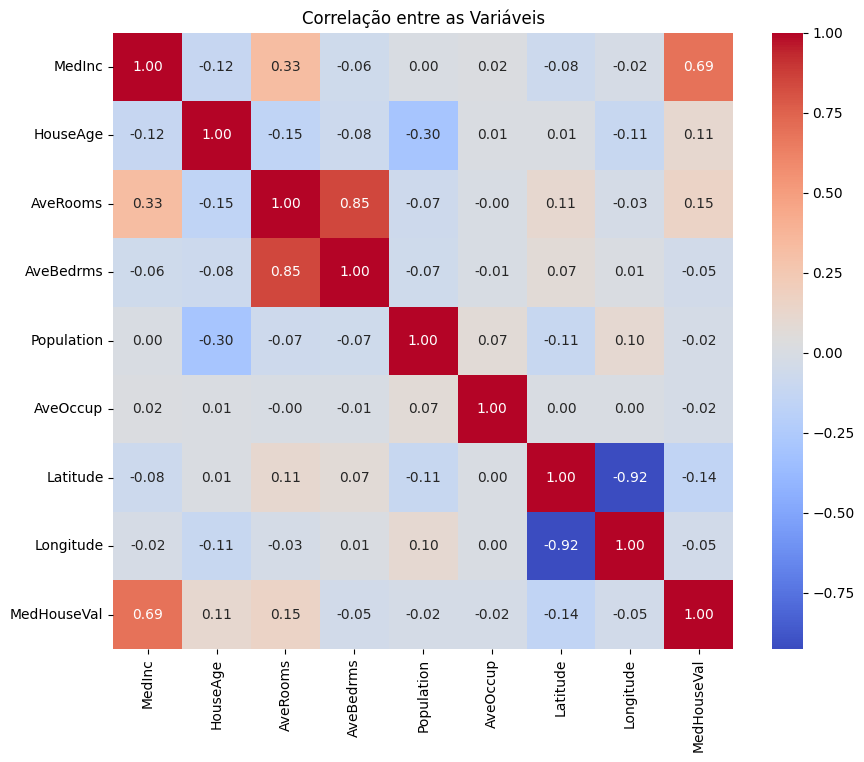

MAE Treino: 0.3192
MAE Validação: 0.4311
MAE Teste: 0.4262
R² Treino: 0.8367
R² Validação: 0.6769
R² Teste: 0.6898


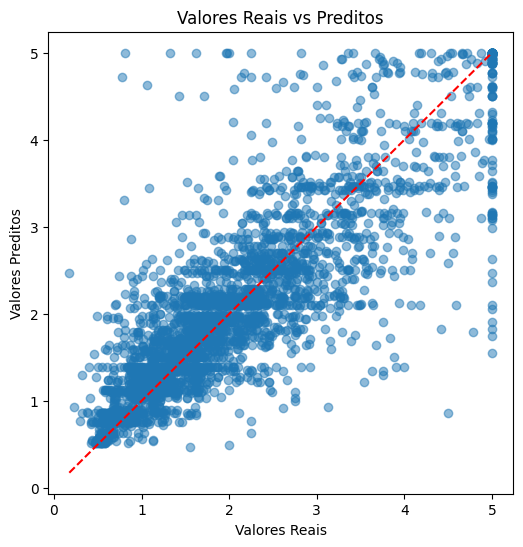

In [31]:
# 1. Carregar os dados
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Adicionando a variável alvo

# 2. Exploração dos dados
print(df.info())
print(df.describe())

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre as Variáveis")
plt.show()

# 3. Pré-processamento
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Divisão dos dados em treino, validação e teste (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Criar e treinar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# 5. Avaliação do Modelo
y_train_pred = tree_model.predict(X_train)
y_val_pred = tree_model.predict(X_val)
y_test_pred_dt = tree_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred_dt)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"MAE Treino: {mae_train:.4f}")
print(f"MAE Validação: {mae_val:.4f}")
print(f"MAE Teste: {mae_test:.4f}")
print(f"R² Treino: {r2_train:.4f}")
print(f"R² Validação: {r2_val:.4f}")
print(f"R² Teste: {r2_test:.4f}")

# 6. Visualização dos Resultados
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs Preditos")
plt.show()

Em seguinda, com o `RandomForestRegressor`:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

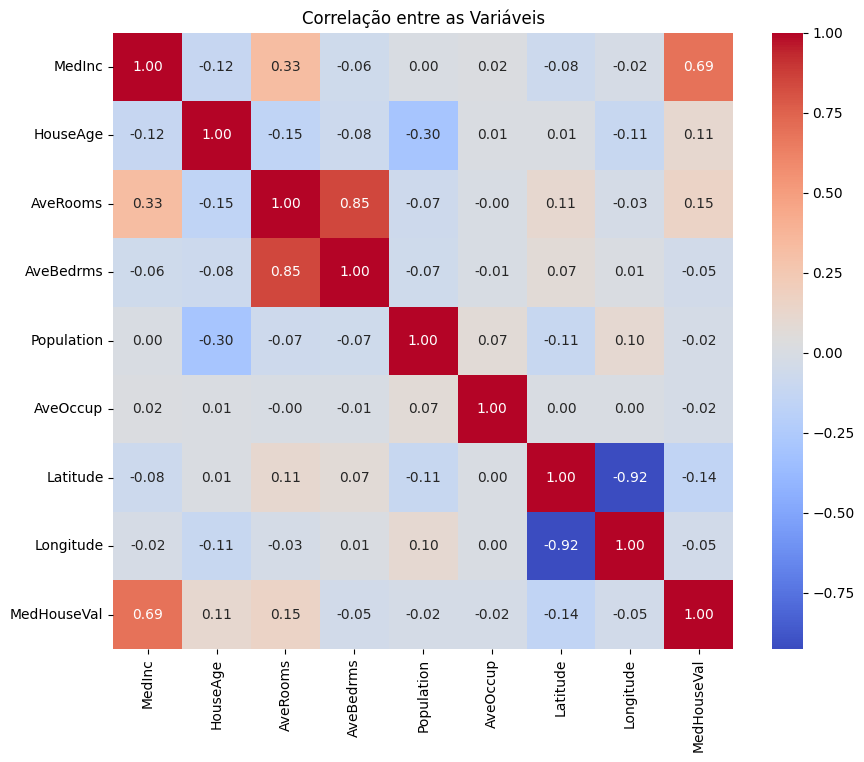

MAE - Treino: 0.2916
MAE - Validação: 0.3748
MAE - Teste: 0.3605
R² - Treino: 0.8735
R² - Validação: 0.7606
R² - Teste: 0.7904


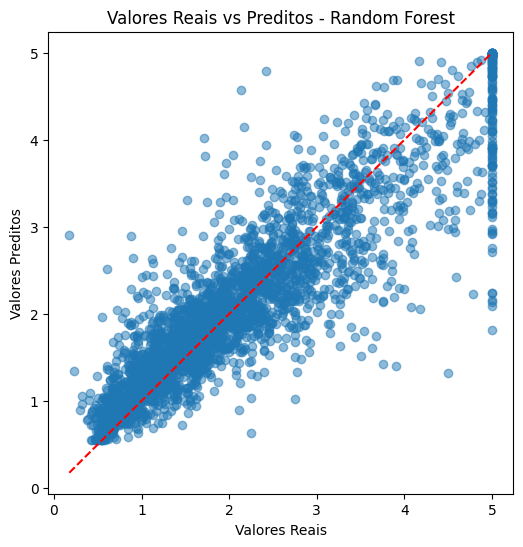

In [32]:
# 1. Carregar os dados
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Variável alvo

# 2. Exploração dos dados
print(df.info())
print(df.describe())

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre as Variáveis")
plt.show()

# 3. Pré-processamento
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Divisão dos dados em treino, validação e teste (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Criar e treinar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Avaliação do Modelo
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Métricas de desempenho
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred_rf)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred_rf)

print(f"MAE - Treino: {mae_train:.4f}")
print(f"MAE - Validação: {mae_val:.4f}")
print(f"MAE - Teste: {mae_test:.4f}")
print(f"R² - Treino: {r2_train:.4f}")
print(f"R² - Validação: {r2_val:.4f}")
print(f"R² - Teste: {r2_test:.4f}")

# 6. Visualização dos Resultados
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs Preditos - Random Forest")
plt.show()

# 9. Comparação entre Redes Neurais e Árvores de Decisão

Assim, obtidos todos os valores previstos pode-se comparar os modelos plontando todos em um mesmo gráfico, como se observa:

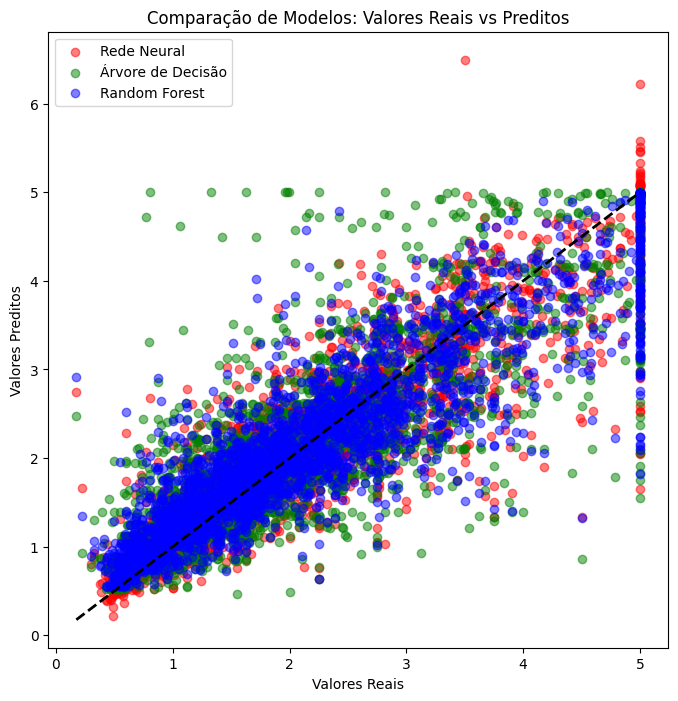

In [33]:
import matplotlib.pyplot as plt

# Substitua esses arrays pelos valores preditos reais de cada modelo
y_test_real = y_test  # Valores reais
y_pred_nn = predictions  # Predições da Rede Neural
y_pred_dt = y_test_pred_dt  # Predições da Árvore de Decisão
y_pred_rf = y_test_pred_rf  # Predições do Random Forest

plt.figure(figsize=(8, 8))

# Scatter plot para cada modelo
plt.scatter(y_test_real, y_pred_nn, alpha=0.5, label="Rede Neural", color='red')
plt.scatter(y_test_real, y_pred_dt, alpha=0.5, label="Árvore de Decisão", color='green')
plt.scatter(y_test_real, y_pred_rf, alpha=0.5, label="Random Forest", color='blue')

# Linha ideal (x = y)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'k--', lw=2)

# Configurações do gráfico
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação de Modelos: Valores Reais vs Preditos")
plt.legend()
plt.show()



Percebe-se que os dados dos modelos de Redes neurais e `RandomForestRegressor` estão mais próximos da linha ideal, e como se sabe quanto mais próximo da linha, melhor a predição do modelo. Ainda assim a vizualização da dispersão das predições é difícil, pois muitos pontos estão sobrepostos, dessa forma foi gerado um **histograma**, no qual exibe a distribuição das diferenças entre os valores preditos e reais.

<ipython-input-39-1aa3917bd03e>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_real = y_test.ravel()


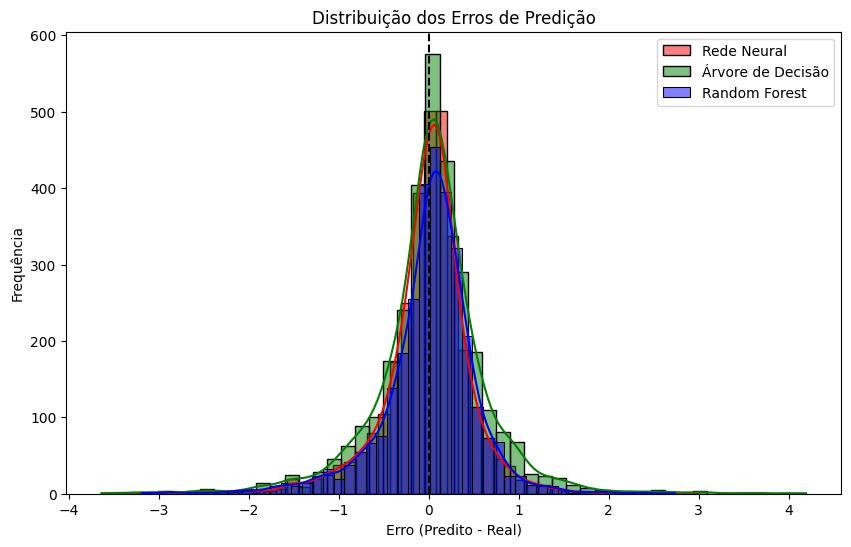

In [39]:
# Garantir que os arrays estão na forma correta (1D)
y_test_real = y_test.ravel()
y_pred_nn = predictions.ravel()
y_pred_dt = y_test_pred_dt.ravel()
y_pred_rf = y_test_pred_rf.ravel()

# Calculando os erros (diferença entre valores preditos e reais)
errors_nn = y_pred_nn - y_test_real
errors_dt = y_pred_dt - y_test_real
errors_rf = y_pred_rf - y_test_real

plt.figure(figsize=(10, 6))

# Histograma dos erros para cada modelo
sns.histplot(errors_nn, bins=50, color='red', alpha=0.5, label="Rede Neural", kde=True)
sns.histplot(errors_dt, bins=50, color='green', alpha=0.5, label="Árvore de Decisão", kde=True)
sns.histplot(errors_rf, bins=50, color='blue', alpha=0.5, label="Random Forest", kde=True)

plt.axvline(0, color='black', linestyle='dashed')  # Linha central indicando erro zero

# Configurações do gráfico
plt.xlabel("Erro (Predito - Real)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros de Predição")
plt.legend()
plt.show()


# 9. Conclusão da Árvores de Decisão

Portanto, nota-se que o modelo de `RandomForestRegressor` possui menos dispersão, pois os demais tem uma "cauda" mais longa. Conclui-se que Árvores de Decisão (com `RandomForestRegressor`) tem melhores predições